# Land Use

In [1]:
import geopandas as gpd 
import contextily as ctx

In [3]:
print(gpd.list_layers('data/landuse.zip'))

      name geometry_type
0  landuse       Polygon


In [4]:
landuse = gpd.read_file('data/landuse.zip') 
landuse.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 25658 entries, 0 to 25657
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   OBJECTID    25658 non-null  int64         
 1   LandUseCat  25658 non-null  object        
 2   LandUseDes  25658 non-null  object        
 3   OldLandUse  25656 non-null  object        
 4   OldLandU_1  25656 non-null  object        
 5   LastUpdate  1919 non-null   datetime64[ms]
 6   created_us  2104 non-null   object        
 7   created_da  2104 non-null   datetime64[ms]
 8   last_edite  6188 non-null   object        
 9   last_edi_1  6188 non-null   datetime64[ms]
 10  STAr        25658 non-null  float64       
 11  STLe        25658 non-null  float64       
 12  geometry    25658 non-null  geometry      
dtypes: datetime64[ms](3), float64(2), geometry(1), int64(1), object(6)
memory usage: 2.5+ MB


In [5]:
landuse.drop(columns=['LastUpdate', 'created_us', 'created_da', 
                     'last_edite', 'last_edi_1', 'STAr', 'STLe'], 
            inplace=True)
print(landuse.iloc[1:1000:200])

     OBJECTID                    LandUseCat  \
1        7611  01 | Low-density Residential   
201     10201      04 | Commercial Services   
401      7491               06 | Industrial   
601     18886  01 | Low-density Residential   
801      2825             02 | Multi-family   

                                            LandUseDes  \
1                01 | Dwelling, single-family detached   
201     04 | Construction contractor facility and yard   
401                                   06 | Warehousing   
601              01 | Dwelling, single-family detached   
801  02 | Dwelling, multi-family (greater than 2 un...   

                  OldLandUse                        OldLandU_1  \
1              SINGLE FAMILY  1111 - SINGLE FAMILY RESIDENTIAL   
201       COMMERCIAL SERVICE      3610 - GENERAL BUILDING CTR.   
401  WHOLESALE / WAREHOUSING    4300 - WAREHOUSING AND STORAGE   
601            SINGLE FAMILY  1111 - SINGLE FAMILY RESIDENTIAL   
801             MULTI FAMILY   1255 - 

In [6]:
landuse.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 25658 entries, 0 to 25657
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    25658 non-null  int64   
 1   LandUseCat  25658 non-null  object  
 2   LandUseDes  25658 non-null  object  
 3   OldLandUse  25656 non-null  object  
 4   OldLandU_1  25656 non-null  object  
 5   geometry    25658 non-null  geometry
dtypes: geometry(1), int64(1), object(4)
memory usage: 1.2+ MB


In [7]:
landuse.LandUseCat.unique()

array(['01 | Low-density Residential', '16 | Utilities', '15 | Vacant',
       '06 | Industrial', '05 | Office', '04 | Commercial Services',
       '17 | Community', '13 | Parks and Open Space',
       '03 | Commercial Retail', '10 | Transportation', '14 | Drainage',
       '11 | Agriculture', '02 | Multi-family',
       '07 | Institutional / Medical', '08 | Educational', '09 | Airport',
       '18 | KAFB'], dtype=object)

In [22]:
landuse.rename(columns={'LandUseCat': 'Category'}, inplace=True)

In [25]:
landuse.LandUseDes.unique()[::7]

array(['01 | Dwelling, townhouse', '17 | Religious institution',
       '04 | Hotel or motel', '06 | Wholesaling and distribution center',
       '04 | Bank', '04 | Club or event facility', '04 | Self-storage',
       '16 | Wireless Telecommunications Facility',
       '06 | Industrial, not-specified',
       '05 | Research or testing facility', '17 | Stadium or racetrack',
       '17 | Community, other public facility', '10 | Park-and-ride lot',
       '04 | Bed and breakfast', '16 | Solid waste convenience center'],
      dtype=object)

In [26]:
landuse.rename(columns=dict(LandUseDes='UseDescription'), inplace=True)

In [19]:
landuse.OldLandUse.unique()

array(['SINGLE FAMILY', 'TRANSPORTATION / UTILITIES', 'VACANT / OTHER',
       'INDUSTRIAL / MANUFACTURING', 'COMMERCIAL SERVICE',
       'PUBLIC / INSTITUTIONAL', 'PARKS / RECREATION', 'MULTI FAMILY',
       'COMMERCIAL RETAIL', 'PARKING LOTS / STRUCTURES',
       'DRAINAGE / FLOOD CONTROL', 'WHOLESALE / WAREHOUSING',
       'AGRICULTURE', None], dtype=object)

In [27]:
landuse.rename(columns={'OldLandUseCat':'OldCategory'}, inplace=True)

In [30]:
landuse.OldLandU_1.unique()[::20]

array(['1120 - TOWNHOUSE', '3210 - HOTEL OR MOTEL',
       '8312 - COMMUNITY PARK', '9251 - VACANT PARK',
       '1441 - RETIREMENT HOME', '2131 - DISCOUNT DRUGSTORE',
       '3151 - PHOTO STUDIO',
       '2200 - CLOTHING AND RELATED GOODS-ALL OTHER',
       '3875 - SOCIAL AND CIVIC ORGANIZATIONS',
       '6320 - GAS UTILITY RELATED', '7542 - FED POST OFFICE FACILITIES',
       '3910 - INDOOR HEALTH OR GYM FACILITIES',
       '7543 - MILITARY BASES AND INSTALLATIONS',
       '3723 - FURNITURE AND UPHOLSTERY REPAIR',
       '3436 - GEOLOGICAL SERVICES', '3914 - BOWLING ALLEY',
       '8316 - BIOLOGICAL PARK', '3121 - FUNERAL HOME',
       '3621 - STREET CTR.', '3419 - PSYCHOLOGICAL SERVICES',
       '2124 - TOY/HOBBY STORE', '1422 - SORORITY',
       '5214 - BULK FABRICS-MFG',
       '1122 - S.F. HOUSE ATTACHED TO A INDUSTRIAL USE',
       '9312 - ABANDONED MULTI-FAMILY'], dtype=object)

In [31]:
landuse.rename(columns={'OldLandU_1': 'DetailedDescription'}, inplace=True)
landuse.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 25658 entries, 0 to 25657
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   OBJECTID             25658 non-null  int64   
 1   Category             25658 non-null  object  
 2   UseDescription       25658 non-null  object  
 3   OldLandUse           25656 non-null  object  
 4   DetailedDescription  25656 non-null  object  
 5   geometry             25658 non-null  geometry
dtypes: geometry(1), int64(1), object(4)
memory usage: 1.2+ MB


In [32]:
landuse = landuse.to_crs(4267)

In [33]:
import matplotlib.pyplot as plt 

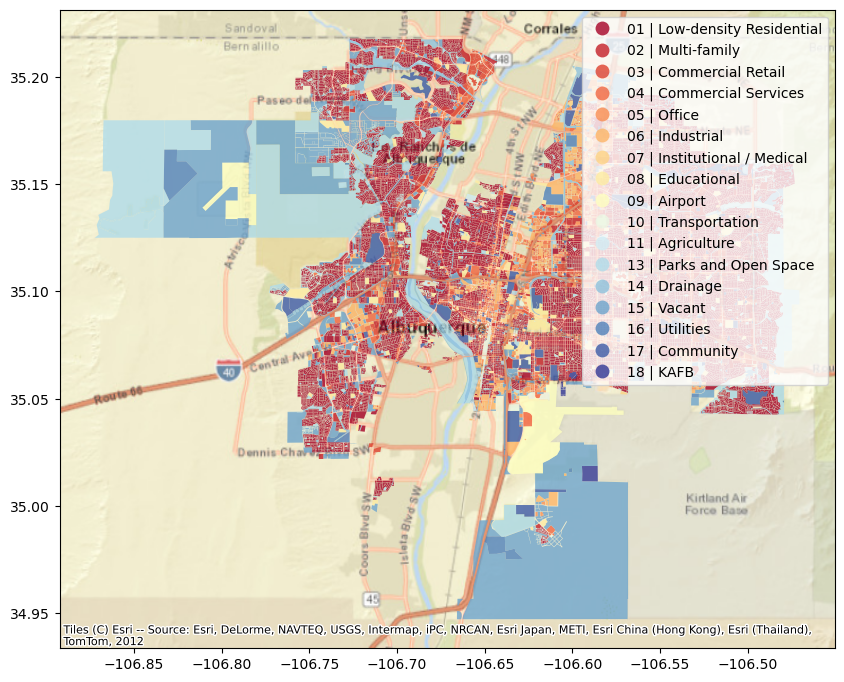

In [37]:
f, ax = plt.subplots(figsize=(10,10))
landuse.plot(
    ax=ax, 
    column='Category', 
    cmap='RdYlBu', 
    alpha=0.8, 
    legend=True,
)
ctx.add_basemap(ax, crs=landuse.crs, source=ctx.providers.Esri.WorldStreetMap)

In [39]:
landuse.to_file('../../../data/local/abq_city_data.gpkg', 
               layer='landuse')

In [40]:
landuse.to_file('../../../localData/City/landuse.gpkg')